In [81]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train_df['Sex'] = encoder.fit_transform(train_df['Sex'])
test_df['Sex'] = encoder.fit_transform(test_df['Sex'])

In [83]:
train_df.drop(['Name', 'Ticket'], axis=1, inplace=True)
test_df.drop(['Name', 'Ticket'], axis=1, inplace=True)
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,7.2500,NaN,S
1,2,1,1,0,38.0,1,0,71.2833,C85,C
2,3,1,3,0,26.0,0,0,7.9250,NaN,S
3,4,1,1,0,35.0,1,0,53.1000,C123,S
4,5,0,3,1,35.0,0,0,8.0500,NaN,S


In [84]:
print(train_df['Embarked'].value_counts())
print(test_df['Cabin'].value_counts()[:14])

S    644
C    168
Q     77
Name: Embarked, dtype: int64
B57 B59 B63 B66    3
F4                 2
C23 C25 C27        2
C89                2
C55 C57            2
B45                2
C80                2
C6                 2
C116               2
C31                2
A34                2
C78                2
C101               2
E34                2
Name: Cabin, dtype: int64


In [85]:
train_df['Embarked'].fillna('S', inplace=True)
test_df['Embarked'].fillna('S', inplace=True)

train_df.drop('Cabin', axis=1, inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)

train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


In [86]:
encoder = LabelEncoder()
train_df['Embarked'] = encoder.fit_transform(train_df['Embarked'])
test_df['Embarked'] = encoder.fit_transform(test_df['Embarked'])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [87]:
print(train_df.isnull().sum(axis=0))
print('')
print('')
print(test_df.isnull().sum(axis=0))

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64


PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


In [88]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy='median')
imputer.fit(train_df)
train_df_imputed = imputer.transform(train_df)

imputer = Imputer(strategy='median')
imputer.fit(test_df)
test_df_imputed = imputer.transform(test_df)

train_df = pd.DataFrame(train_df_imputed, columns=train_df.columns)
test_df = pd.DataFrame(test_df_imputed, columns=test_df.columns)

train_df.head()

/srv/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/srv/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,2.0
1,2.0,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,0.0
2,3.0,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,2.0
3,4.0,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,2.0
4,5.0,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,2.0


In [89]:
train_df = train_df.astype(int)
test_df = test_df.astype(int)

train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22,1,0,7,2
1,2,1,1,0,38,1,0,71,0
2,3,1,3,0,26,0,0,7,2
3,4,1,1,0,35,1,0,53,2
4,5,0,3,1,35,0,0,8,2


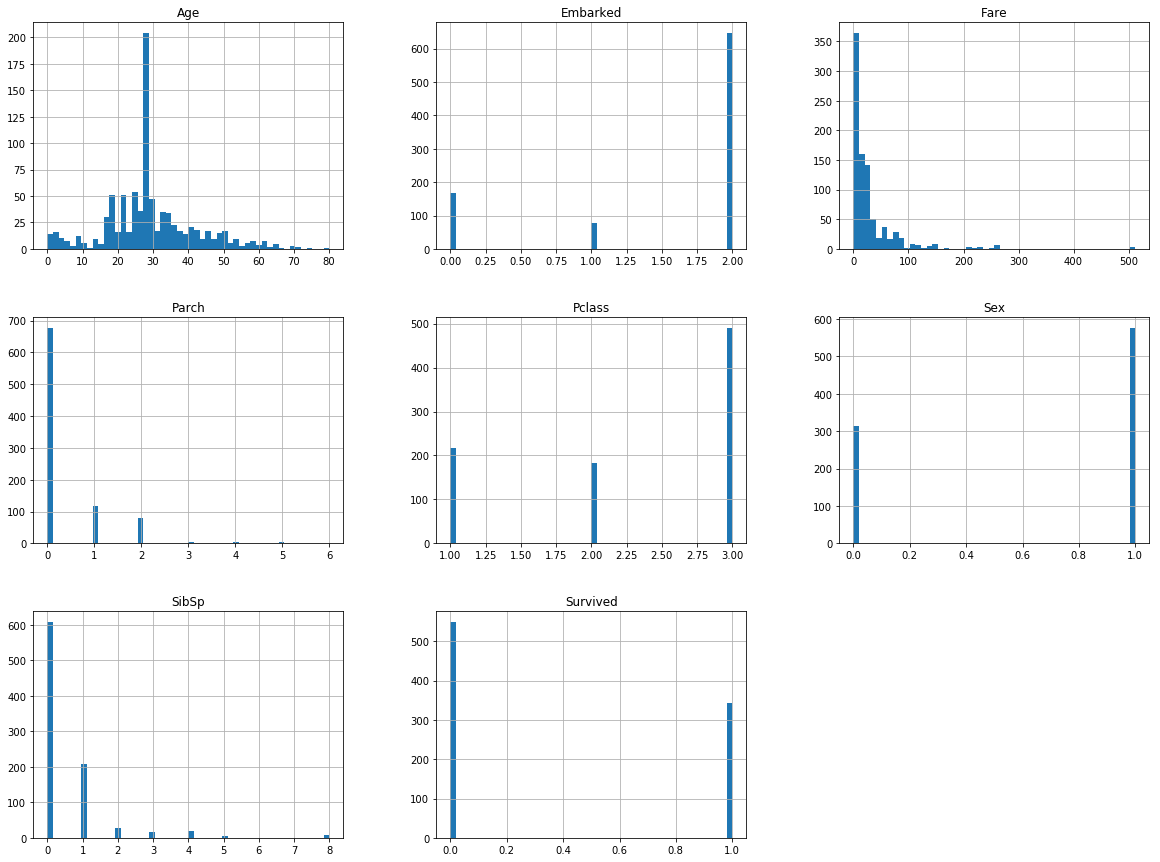

In [90]:
train_df.drop('PassengerId', axis=1).hist(bins=50, figsize=(20,15))
plt.show()

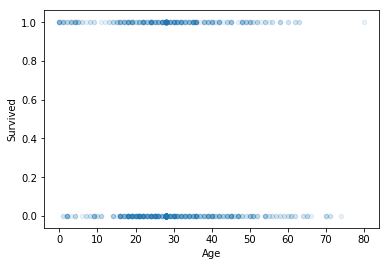

In [91]:
train_df.plot(kind='scatter', x='Age', y='Survived', alpha=0.1)

In [92]:
corr_matrix = train_df.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257482
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064909
Embarked      -0.167675
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0292deeb8>,
      dtype=object)

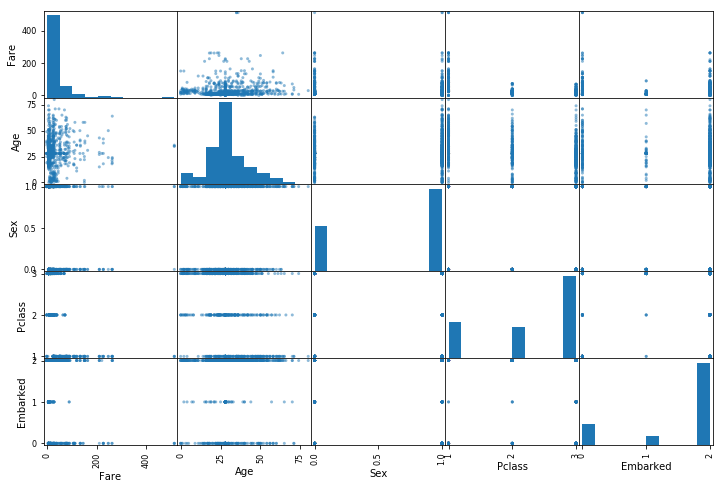

In [93]:
from pandas.plotting import scatter_matrix

attributes = ['Fare', 'Age', 'Sex', 'Pclass', 'Embarked']
scatter_matrix(train_df[attributes], figsize=(12,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0283935c0>,
      dtype=object)

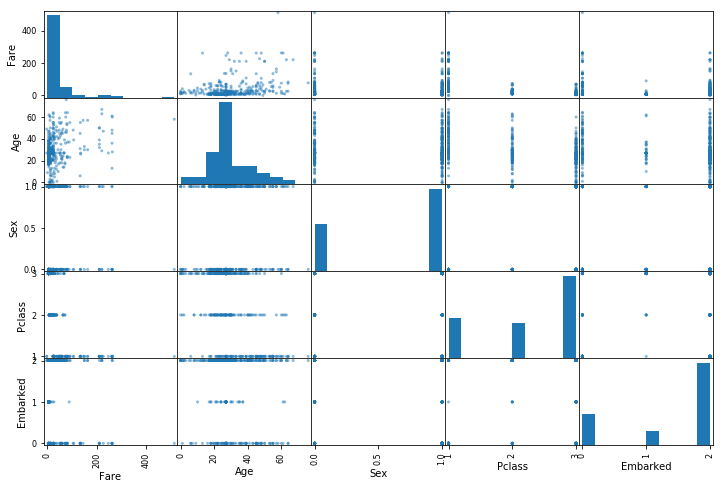

In [94]:
scatter_matrix(test_df[attributes], figsize=(12,8))

In [95]:
train_df['Embarked0'] = train_df['Embarked'] == 0
train_df['Embarked2'] = train_df['Embarked'] == 2

train_df['Pclass0'] = train_df['Pclass'] == 0
train_df['Pclass2'] = train_df['Pclass'] == 2

test_df['Embarked0'] = test_df['Embarked'] == 0
test_df['Embarked2'] = test_df['Embarked'] == 2

test_df['Pclass0'] = test_df['Pclass'] == 0
test_df['Pclass2'] = test_df['Pclass'] == 2

train_df = train_df.astype(int)
test_df = test_df.astype(int)

train_df.drop('Embarked', axis=1, inplace=True)
train_df.drop('Pclass', axis=1, inplace=True)
test_df.drop('Embarked', axis=1, inplace=True)
test_df.drop('Pclass', axis=1, inplace=True)

train_df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Embarked0,Embarked2,Pclass0,Pclass2
0,1,0,1,22,1,0,7,0,1,0,0
1,2,1,0,38,1,0,71,1,0,0,0
2,3,1,0,26,0,0,7,0,1,0,0
3,4,1,0,35,1,0,53,0,1,0,0
4,5,0,1,35,0,0,8,0,1,0,0
